In [40]:
import random

In [41]:
population = []
population_length = 30
parent_length = population_length // 3
mutation_rate = 0.1
current_best_fitness = -1
current_best_combination = []

In [42]:
# randomly initialise the list of items
weight = [random.randint(1, 10) for i in range(0, 10)]
value = [random.randint(1, 100) for i in range(0, 10)]
# print item no, weight and value
for i in range(0, 10):
    print("Item", i, ": Weight", weight[i], "Value", value[i])

Item 0 : Weight 7 Value 22
Item 1 : Weight 4 Value 54
Item 2 : Weight 6 Value 82
Item 3 : Weight 2 Value 61
Item 4 : Weight 10 Value 9
Item 5 : Weight 7 Value 52
Item 6 : Weight 1 Value 74
Item 7 : Weight 7 Value 59
Item 8 : Weight 4 Value 29
Item 9 : Weight 2 Value 41


In [43]:
def generate_initial_population(count : int = population_length):
    """
    Generate initial population of size count
    :param count: size of population
    :return: list of population
    """
    
    temp_initial_population = list()

    while len(temp_initial_population) != count:
        # 10 because we have 10 items
        bits = [random.choice([0, 1]) for _ in range(10)]
        temp_initial_population.append(bits)

    return temp_initial_population

In [44]:
def fitness(combination : list[int]):
    """
    Fitness function
    :param combination: list of 0 and 1, length 10
    Does not take the whole population, accepts only a member of the population, i.e
    a list of length 10 that has int value either 0 or 1
    :return: fitness value
    """
    
    
    total_value = sum([combination[_] * value[_] for _ in range(10)])

    total_weight = sum([combination[_] * weight[_] for _ in range(10)])

    if total_weight <= 35:
        return total_value

    else:
        return total_weight - 35

In [45]:
def selection(population: list[list[int]]):
    """
    Selection function
    :param population: list of population, accepts the whole population
    RUNS fitness() FUNCTION ON EACH COMBINATION AND SORTS BY FITNESS
    :return: selected parents
    returns the top "parents_length" number of combinations as selected parents
    """
    
    parents = {}

    for combination in population:
        parents[fitness(combination)] = combination

    sorted_parents = dict(sorted(parents.items(), key=lambda item: item[0], reverse=True))

    return [value for key, value in list(sorted_parents.items())[:parent_length]]

In [46]:
def crossover(population : list[list[int]]):
    """
    One Point Crossover function
    :param population: list of population, accepts the whole population
    USES selection() FUNCTION TO SELECT PARENTS
    :return: new population with selected parents and their children via crossover
    """
    parents = selection(population)
    N = len(parents[0])

    while len(parents) != population_length:
        val1 = random.randint(0, parent_length-1)
        val2 = random.randint(0, parent_length-1)
        child1 = parents[val1][0:N//2] + parents[val2][N//2:]
        child2 = parents[val2][0:N//2] + parents[val1][N//2:]
        parents.extend([child1, child2])
    return parents

In [47]:
def mutate(population: list[list[int]]):
    """
    Mutation function
    This will hold the whole population, mutated or not
    Will use the same function to calculate the best fitness in the iteration
    :param population: list of population, accepts the whole population
    :return: new population with mutated children
    """
    temp_mutated_population = []
    temp_fitness = -1
    temp_combination = []
    
    for combination in population:
        for i in range(len(combination)):
            if random.random() < 0.2:
                combination[i] = 0 if combination[i] == 1 else 1
        test_fitness = fitness(combination)
        if test_fitness > temp_fitness:
            temp_fitness = test_fitness
            temp_combination = combination
        temp_mutated_population.append(combination)
    
    return temp_mutated_population, temp_fitness, temp_combination

In [48]:
# declare the initial population
population = generate_initial_population(population_length)
# print the initial population
print(f"Population length: {population_length}\nInitial population:")
for i in range(0, population_length):
    print(population[i])

Population length: 30
Initial population:
[1, 1, 1, 0, 0, 1, 0, 1, 0, 0]
[1, 0, 1, 0, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 1, 0, 1, 1, 1]
[1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
[0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
[0, 1, 0, 1, 1, 0, 0, 0, 1, 1]
[1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
[0, 1, 0, 1, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 0, 0, 1, 1, 0]
[1, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[0, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 0, 1, 1, 0, 1, 1]
[1, 1, 0, 1, 0, 1, 1, 1, 0, 1]
[0, 1, 1, 1, 1, 0, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 1, 1, 0, 0, 0]
[1, 0, 1, 0, 0, 1, 0, 1, 1, 0]
[1, 0, 0, 1, 1, 1, 1, 0, 0, 0]
[1, 1, 0, 1, 1, 1, 1, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 0, 1, 0, 0]
[1, 0, 0, 1, 0, 1, 1, 0, 1, 1]
[1, 0, 1, 1, 1, 0, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 1, 0]
[1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
[1, 1, 0, 0, 1, 1, 1, 0, 0, 1]
[0, 0, 1, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 1, 1, 1, 0, 1, 0, 1, 1]


In [49]:
# GA loop
iteration_number = 0
fitenss_vals = []
current_best_fitness_vals = []
while True:
    # crossover() function calls selection() function and selection() function calls fitness() function
    # So function call flowchart is: generate_initial_population() -> fitness() -> selection() -> crossover() -> mutate()
    population = crossover(population)
    population, best_fitness_in_this_iteration, best_combinationin_this_iteration = mutate(population)
    fitenss_vals.append(best_fitness_in_this_iteration)
    iteration_number += 1
    if best_fitness_in_this_iteration == current_best_fitness:
        current_best_fitness_vals.append(best_fitness_in_this_iteration)
        print("***********************")
        print("Found same fitness as previous best fitness")
        print("***********************")
        if current_best_combination == best_combinationin_this_iteration:
            print("***********************")
            print("best combination matched, solution found")
            print("***********************")
            print()
            print("#############################################")
            print(f"Iteration Number : {iteration_number}")
            print(f"Best Fitness : {current_best_fitness}")
            print(f"Best combination : {current_best_combination}")
            print("#############################################")
            break
        else:
            current_best_combination = best_combinationin_this_iteration
            print("========================")
            print(f"Iteration Number : {iteration_number}")
            print(f"Fitness Score : {best_fitness_in_this_iteration}")
            print(f"Combination : {best_combinationin_this_iteration}")
            print("========================")
        
    elif best_fitness_in_this_iteration > current_best_fitness:
        current_best_fitness = best_fitness_in_this_iteration
        current_best_fitness_vals.append(best_fitness_in_this_iteration)
        current_best_combination = best_combinationin_this_iteration
        print("========================")
        print(f"Iteration Number : {iteration_number}")
        print(f"Fitness Score : {best_fitness_in_this_iteration}")
        print(f"Combination : {best_combinationin_this_iteration}")
        print("========================")
    else:
        current_best_fitness_vals.append(current_best_fitness)
    

Iteration Number : 1
Fitness Score : 384
Combination : [1, 1, 1, 0, 0, 1, 1, 1, 0, 1]
***********************
Found same fitness as previous best fitness
***********************
Iteration Number : 2
Fitness Score : 384
Combination : [1, 1, 1, 0, 0, 1, 1, 1, 0, 1]
Iteration Number : 3
Fitness Score : 391
Combination : [0, 1, 1, 0, 0, 1, 1, 1, 1, 1]
Iteration Number : 4
Fitness Score : 415
Combination : [1, 1, 1, 1, 0, 1, 1, 0, 1, 1]
Iteration Number : 7
Fitness Score : 452
Combination : [0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
***********************
Found same fitness as previous best fitness
***********************
Iteration Number : 15
Fitness Score : 452
Combination : [0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
***********************
Found same fitness as previous best fitness
***********************
***********************
best combination matched, solution found
***********************

#############################################
Iteration Number : 16
Best Fitness : 452
Best combination : [0, 1, 1, 1

In [50]:
num_of_items_selected = 0
total_weight = 0
total_value = 0
for i in range(0, len(current_best_combination)):
    if current_best_combination[i] == 1:
        print(f"Item {i} is selected with value {value[i]} and weight {weight[i]}")
        num_of_items_selected += 1
        total_weight += weight[i]
        total_value += value[i]
print("-------------------------------------------------")
print(f"Total {num_of_items_selected} items selected, total value {total_value} and total weight {total_weight}")

Item 1 is selected with value 54 and weight 4
Item 2 is selected with value 82 and weight 6
Item 3 is selected with value 61 and weight 2
Item 5 is selected with value 52 and weight 7
Item 6 is selected with value 74 and weight 1
Item 7 is selected with value 59 and weight 7
Item 8 is selected with value 29 and weight 4
Item 9 is selected with value 41 and weight 2
-------------------------------------------------
Total 8 items selected, total value 452 and total weight 33


Text(0, 0.5, 'Fitness Score')

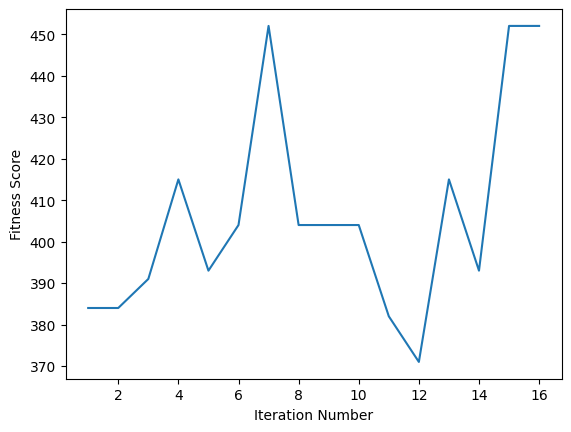

In [51]:
# plot iteration_number vs iteration_fitness
import matplotlib.pyplot as plt
plt.plot([i for i in range(1, iteration_number+1)], fitenss_vals)
plt.xlabel("Iteration Number")
plt.ylabel("Fitness Score")

Text(0, 0.5, 'Fitness Score')

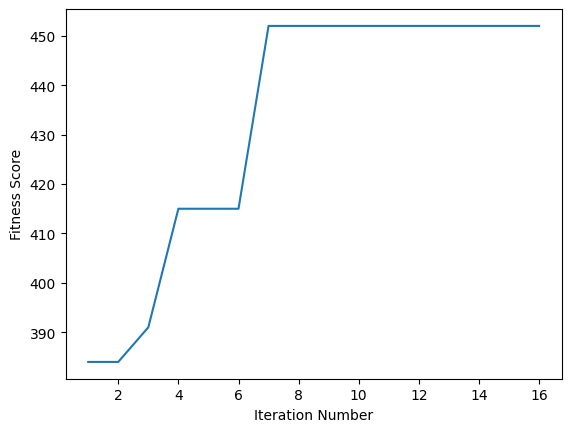

In [52]:
# plot iteration_number vs iteration_fitness
import matplotlib.pyplot as plt
plt.plot([i for i in range(1, iteration_number+1)], current_best_fitness_vals)
plt.xlabel("Iteration Number")
plt.ylabel("Fitness Score")